### Assignment 3: Data Preparation

In [2]:
# Setting up necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# locating housing.csv
file_path = r'C:\Users\wangy\Documents\Foundation of Data Science\Assignment 03\housing.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### Merging datasets

Given that the dataset is comprehensive and includes all required information for this research project,  
there will be no need to merge datasets.  
Furthermore, it is preferable to handle all feature attributes separately,  
without combining them, to maintain their integrity for individual analysis.  
Therefore, in this research assignment, data would be used as it is.  




#### Dealing with missing values
For 'housing.csv" dataset, there is only one columns that contains missing values  
Since the feature column 'total_rooms' has no missing data, and it has a strong correlation  with the column 'total_bedrooms',  
Ppredictive imputation is implemented using data from 'total_rooms' column to predict and to fill the missing values in the column 'total_bedrooms'  


In [4]:
# Filter the data where the value is empty
data_with_bedrooms = data.dropna(subset=['total_bedrooms'])

# Prepare the features (X) and the target (y)
X = data_with_bedrooms[['total_rooms']]
y = data_with_bedrooms['total_bedrooms']

# Set up training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict total_bedrooms on the missing values
missing_values_index = data['total_bedrooms'].isnull()
predicted_bedrooms = model.predict(data.loc[missing_values_index, ['total_rooms']])

# Fill in the missing values
data.loc[missing_values_index, 'total_bedrooms'] = predicted_bedrooms

# Check if there are any missing values left in total_bedrooms
remaining_missing_values = data['total_bedrooms'].isnull().sum()
remaining_missing_values


0

#### Data Preparation
The following features are created in order to provide a better understanding of the data and further data modeling  

Feature 1: Rooms per Household  
Total rooms divided by the number of households can indicate the average living space, which might correlate with housing value.  
  
Feature 2: Bedrooms to Room ratio  
Total bedrooms divided by total rooms could indicate how densely packed with bedrooms the houses in the area are, potentially affecting housing value.  
  
Feature 3: Population per Houshold  
Indicates how many people live in an average household, which might affect housing demand and values.  

Feature 4: Income Category  
Convert median income to a categorical variable to simplify its relationship with house value.
  
Feature 5: Housing Median Age Category  
Categorizes houses based on their age, which could significantly affect housing values.  

In [5]:
# Feature 1: Rooms per Household
data['rooms_per_household'] = data['total_rooms'] / data['households']

# Feature 2: Bedrooms to Room Ratio
data['bedrooms_to_room_ratio'] = data['total_bedrooms'] / data['total_rooms']

# Feature 3: Population per Household
data['population_per_household'] = data['population'] / data['households']

# Feature 4: Income Category
# Calculate the quartiles of the median income
income_quartiles = pd.qcut(data['median_income'], 4, labels=False)

# Assign these quartiles as income categories
data['income_category'] = income_quartiles + 1

# Feature 5: Housing Median Age Category
# Calculate the quartiles of the housing median age
housing_age_quartiles = pd.qcut(data['housing_median_age'], 4, labels=False)

# Assign these quartiles as housing_median_age categories
data['housing_median_age_category'] = housing_age_quartiles + 1



# Display the first few rows to confirm the new features
new_features = data[['rooms_per_household', 'bedrooms_to_room_ratio', 'population_per_household', 'income_category', 'housing_median_age_category']]
new_features.head()

,rooms_per_household,bedrooms_to_room_ratio,population_per_household,income_category,housing_median_age_category
0,6.984127,0.146591,2.555556,4,4
1,6.238137,0.155797,2.109842,4,2
2,8.288136,0.129516,2.802260,4,4
3,5.817352,0.184458,2.547945,4,4
4,6.281853,0.172096,2.181467,3,4


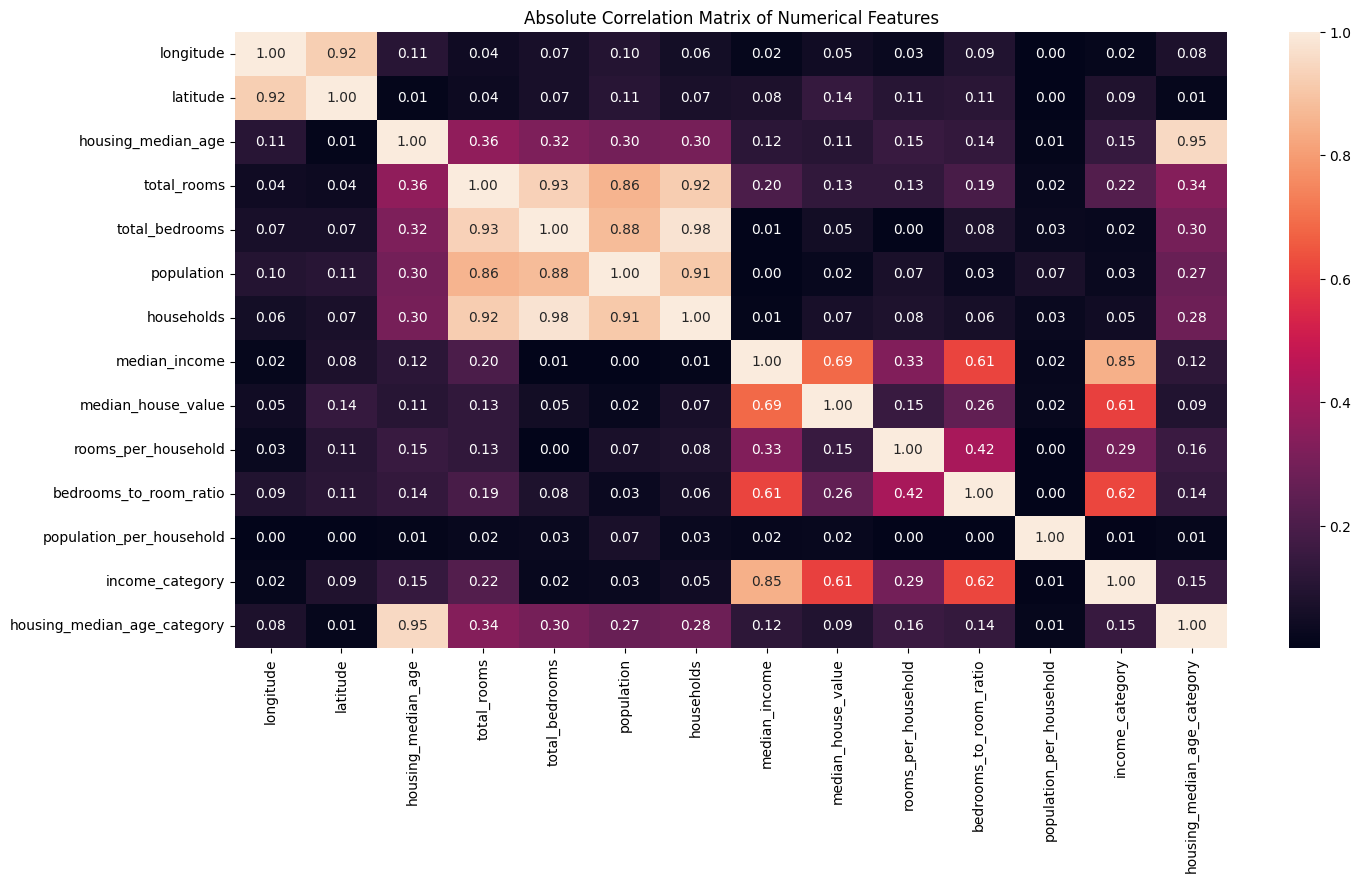

In [6]:
df = pd.DataFrame(data)

# Selecting only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr = numerical_df.corr()

# Generating the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr.abs(), annot=True, fmt='.2f')
plt.title('Absolute Correlation Matrix of Numerical Features')
plt.show()


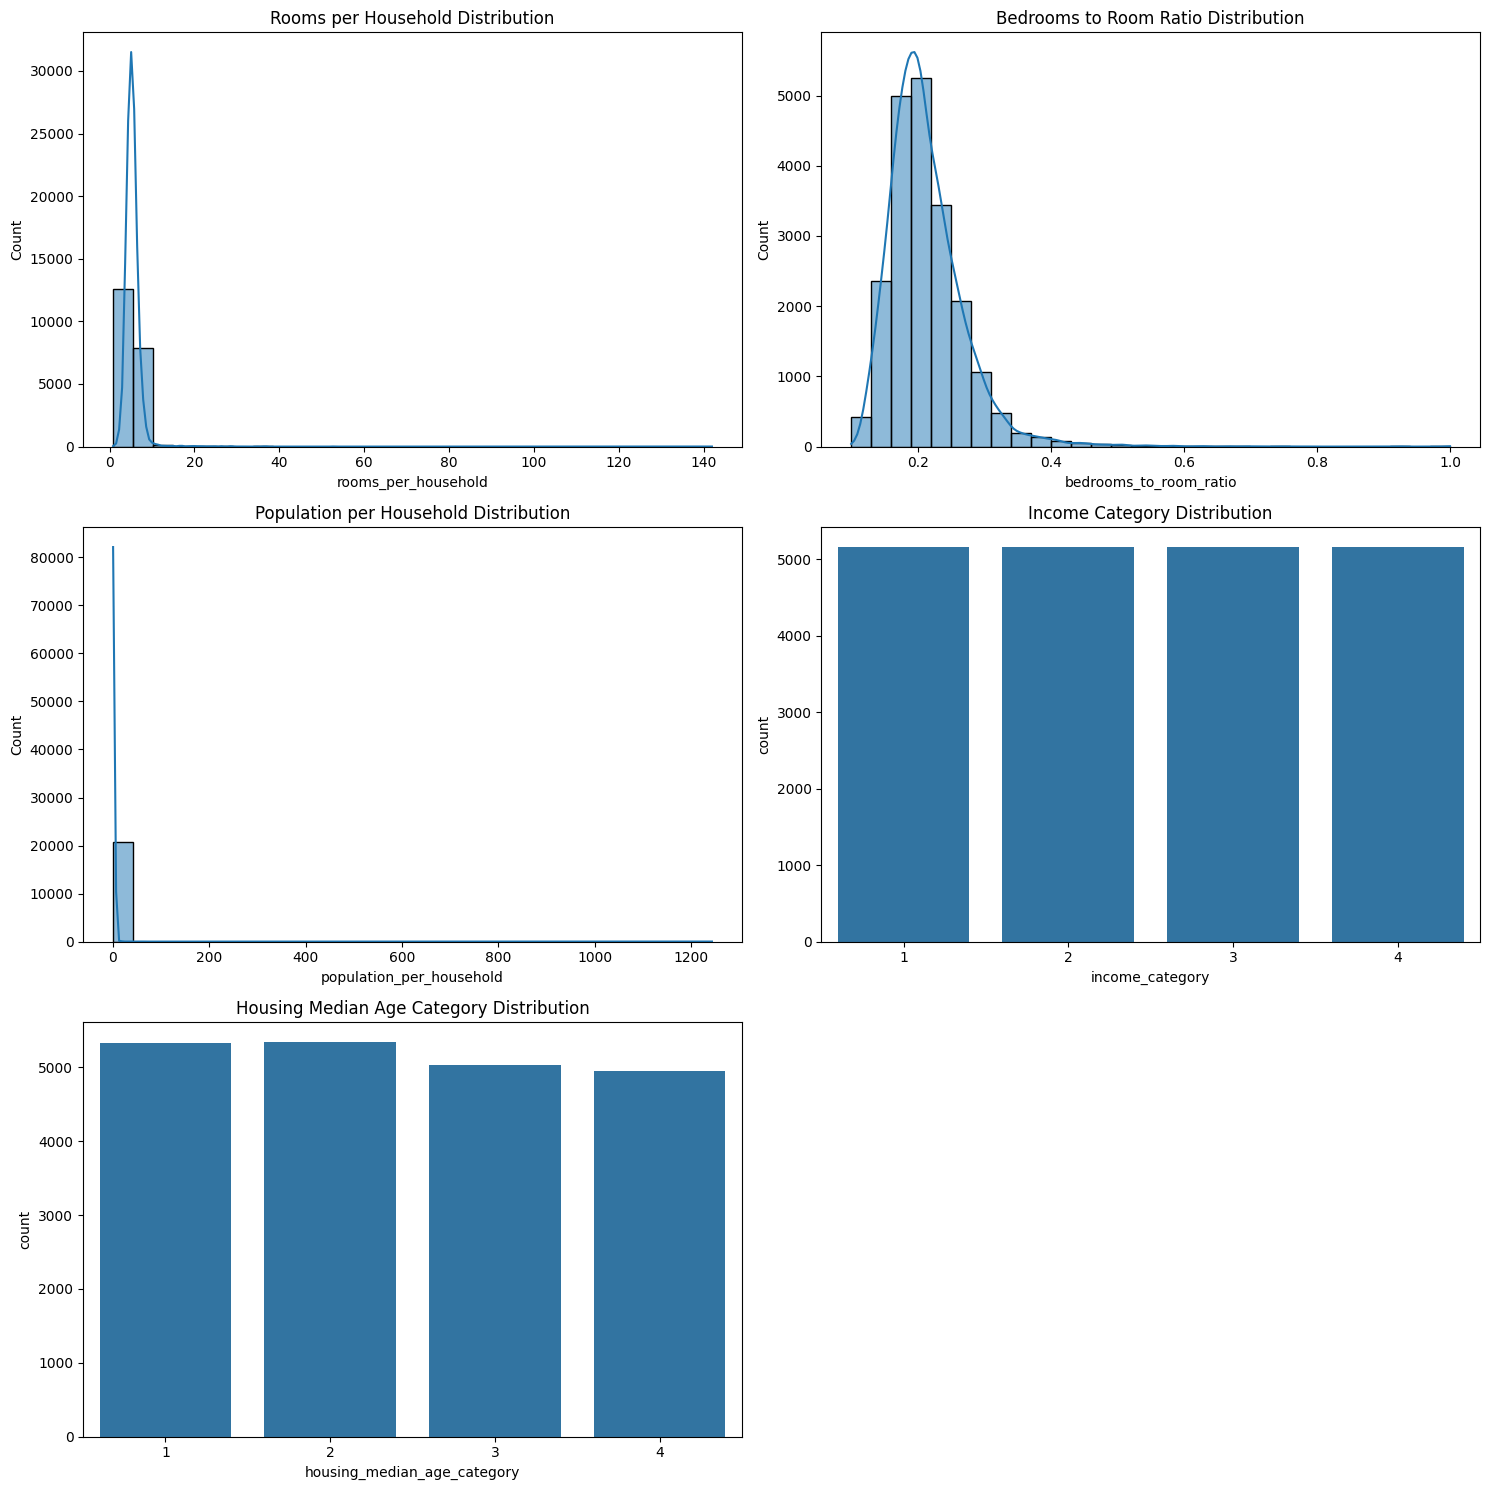

In [7]:

# Converting the dictionary to a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['rooms_per_household'], bins=30, kde=True, ax=axes[0, 0])
sns.histplot(df['bedrooms_to_room_ratio'], bins=30, kde=True, ax=axes[0, 1])
sns.histplot(df['population_per_household'], bins=30, kde=True, ax=axes[1, 0])
sns.countplot(x=df['income_category'], ax=axes[1, 1])
sns.countplot(x=df['housing_median_age_category'], ax=axes[2, 0])

axes[0, 0].set_title('Rooms per Household Distribution')
axes[0, 1].set_title('Bedrooms to Room Ratio Distribution')
axes[1, 0].set_title('Population per Household Distribution')
axes[1, 1].set_title('Income Category Distribution')
axes[2, 0].set_title('Housing Median Age Category Distribution')

# Hiding the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

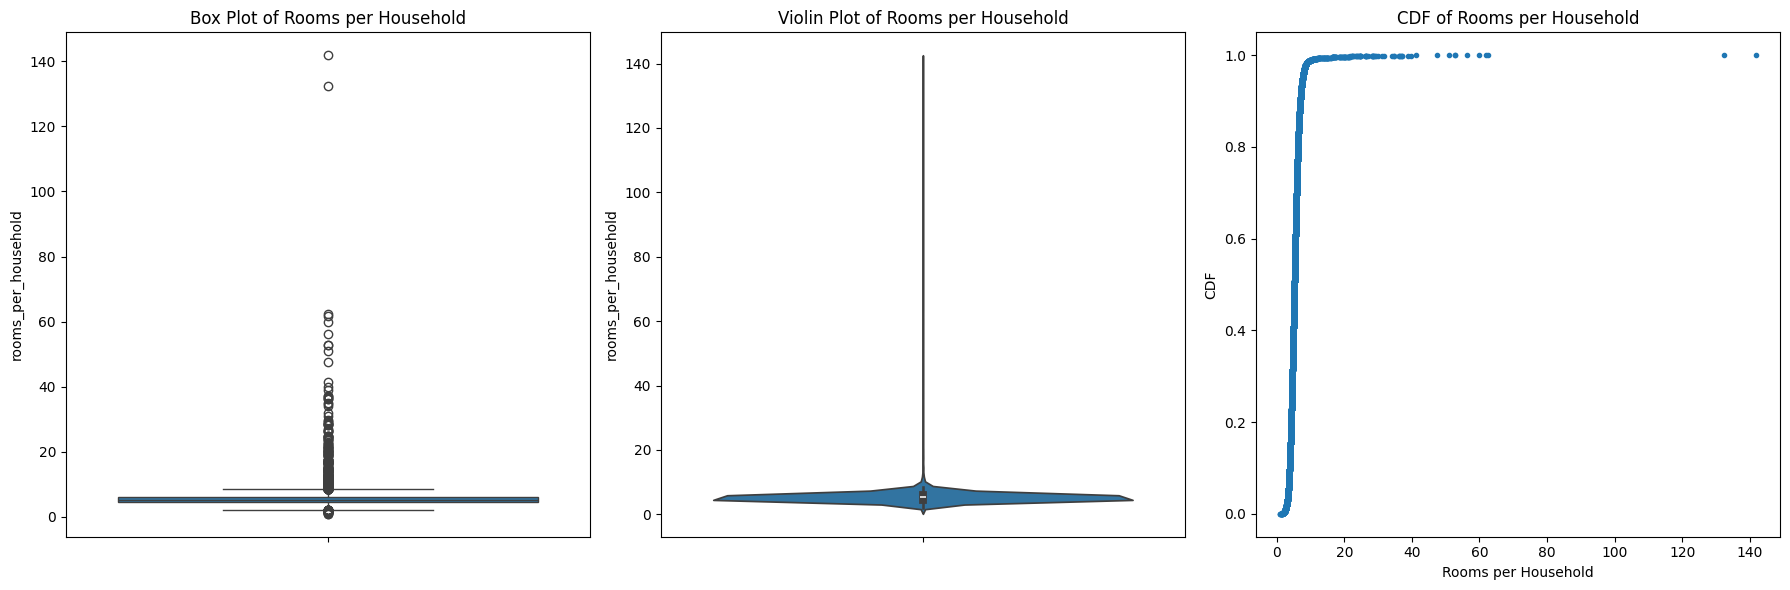

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Rooms per Household
sns.boxplot(y=df['rooms_per_household'], ax=axes[0])
axes[0].set_title('Box Plot of Rooms per Household')

# Violin plot for Rooms per Household
sns.violinplot(y=df['rooms_per_household'], ax=axes[1])
axes[1].set_title('Violin Plot of Rooms per Household')

# CDF for Rooms per Household
# Calculating CDF
x = np.sort(df['rooms_per_household'])
y = np.arange(1, len(x)+1) / len(x)
axes[2].plot(x, y, marker='.', linestyle='none')
axes[2].set_title('CDF of Rooms per Household')
axes[2].set_xlabel('Rooms per Household')
axes[2].set_ylabel('CDF')

plt.tight_layout()
plt.show()

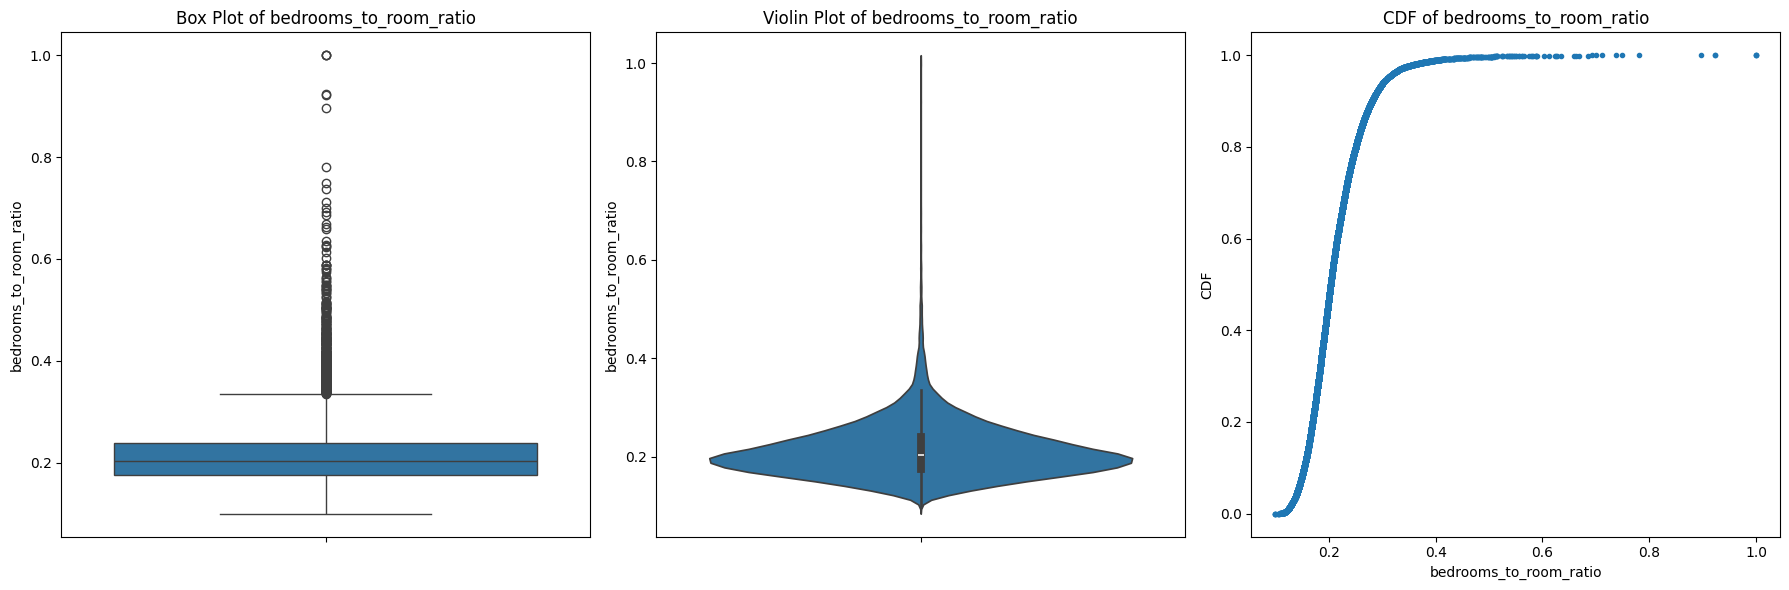

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for bedrooms_to_room_ratio
sns.boxplot(y=df['bedrooms_to_room_ratio'], ax=axes[0])
axes[0].set_title('Box Plot of bedrooms_to_room_ratio')

# Violin plot for bedrooms_to_room_ratio
sns.violinplot(y=df['bedrooms_to_room_ratio'], ax=axes[1])
axes[1].set_title('Violin Plot of bedrooms_to_room_ratio')

# CDF for bedrooms_to_room_ratio
# Calculating CDF
x = np.sort(df['bedrooms_to_room_ratio'])
y = np.arange(1, len(x)+1) / len(x)
axes[2].plot(x, y, marker='.', linestyle='none')
axes[2].set_title('CDF of bedrooms_to_room_ratio')
axes[2].set_xlabel('bedrooms_to_room_ratio')
axes[2].set_ylabel('CDF')

plt.tight_layout()
plt.show()


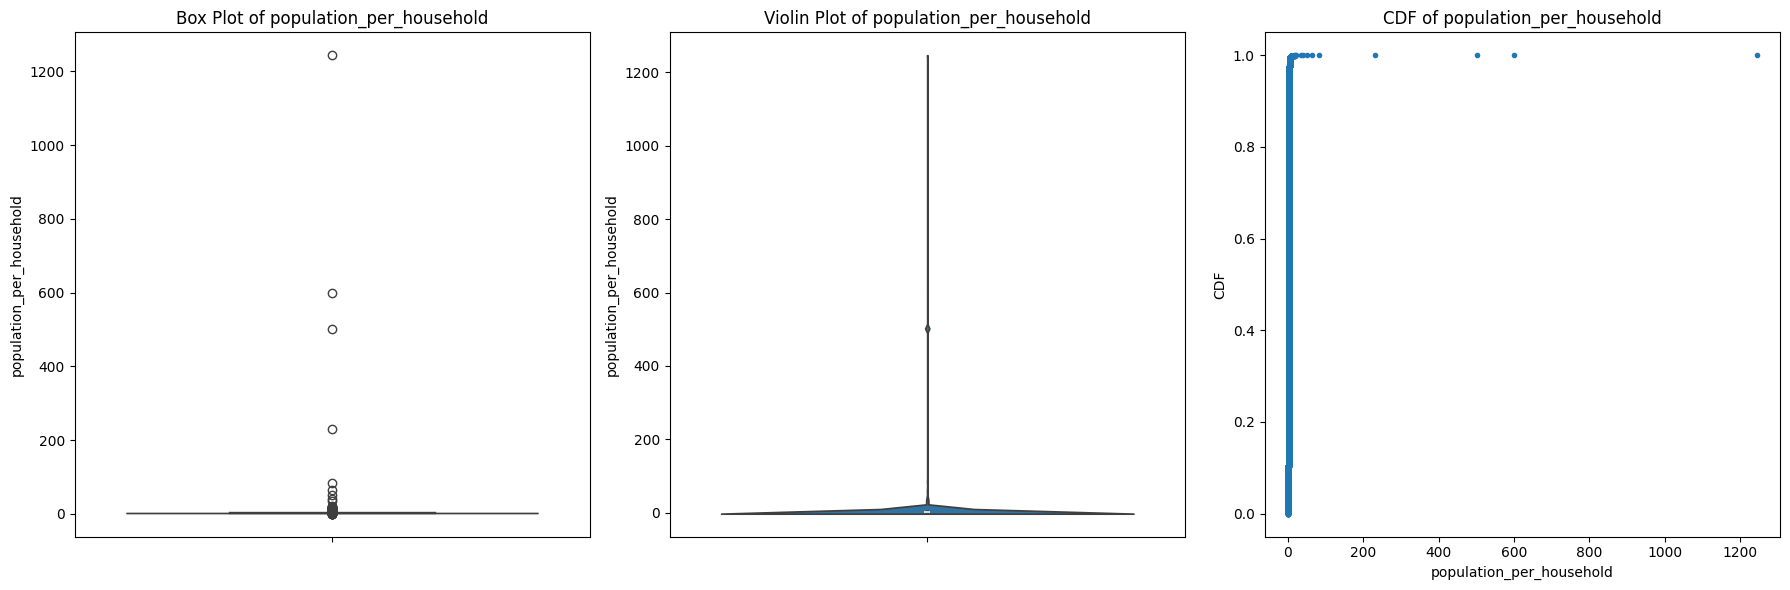

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for population_per_household
sns.boxplot(y=df['population_per_household'], ax=axes[0])
axes[0].set_title('Box Plot of population_per_household')

# Violin plot for population_per_household
sns.violinplot(y=df['population_per_household'], ax=axes[1])
axes[1].set_title('Violin Plot of population_per_household')

# CDF for population_per_household
# Calculating CDF
x = np.sort(df['population_per_household'])
y = np.arange(1, len(x)+1) / len(x)
axes[2].plot(x, y, marker='.', linestyle='none')
axes[2].set_title('CDF of population_per_household')
axes[2].set_xlabel('population_per_household')
axes[2].set_ylabel('CDF')

plt.tight_layout()
plt.show()

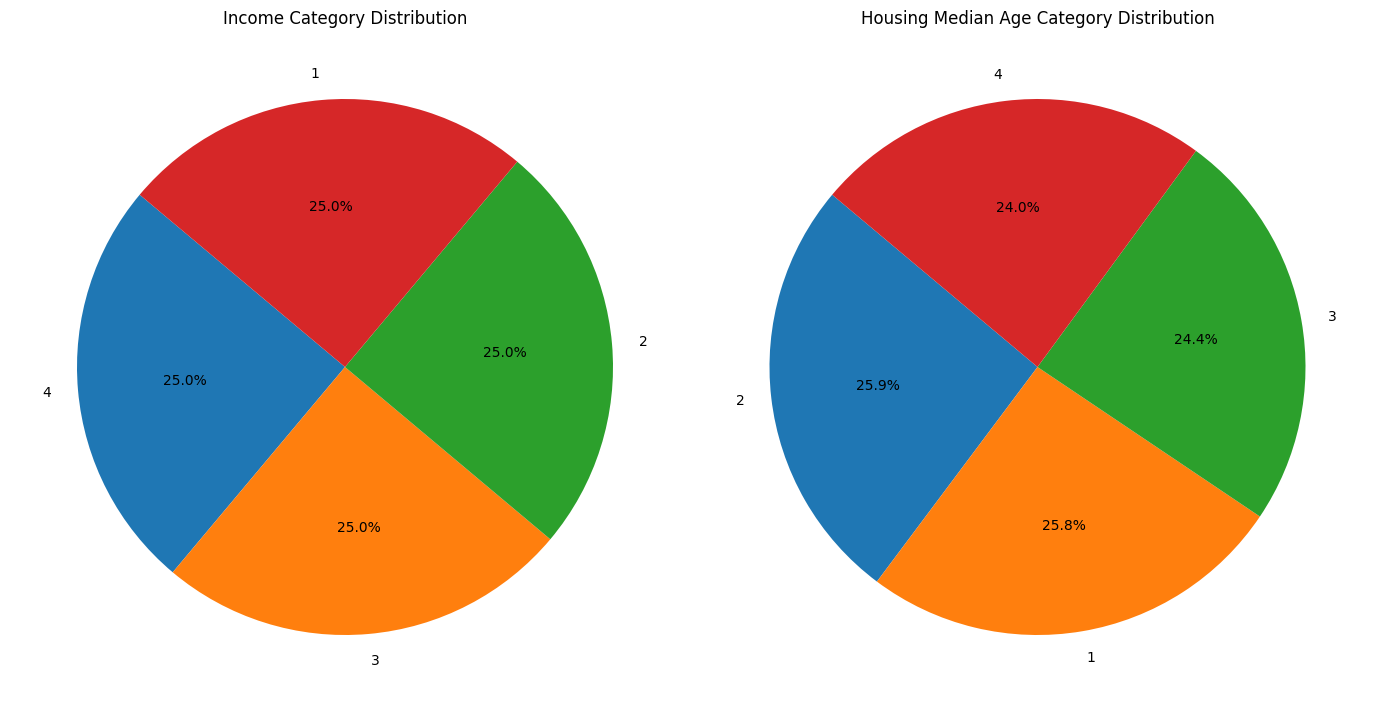

In [11]:
income_category_counts = df['income_category'].value_counts()
housing_median_age_category_counts = df['housing_median_age_category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Income Category
axes[0].pie(income_category_counts, labels=income_category_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Income Category Distribution')

# Pie chart for Housing Median Age Category
axes[1].pie(housing_median_age_category_counts, labels=housing_median_age_category_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Housing Median Age Category Distribution')

plt.tight_layout()
plt.show()

#### Executive Notes
  
Throughout this assignment I have learned the following:  
- Identifying weather a group of data would need to be merged
- Merging dataset from different files
- Using different approaches to deal with missing data value
- Implementing linear regression to train the desired data to come up with scientific estimation
- Identifying and engineering new features for further research
- Displaying new features with proper plotting
- Document data features with entity relationship diagram

Note: For the furthur process, the newly engineered features are not normalized to showcase the true data property.